<a href="https://colab.research.google.com/github/gott51010/zhenXiang/blob/master/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC 
from sklearn.datasets import make_circles, make_moons,make_blobs,make_classification
%matplotlib inline



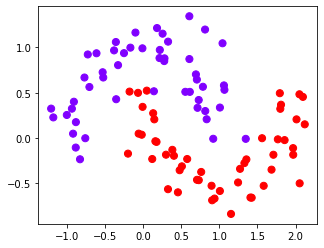

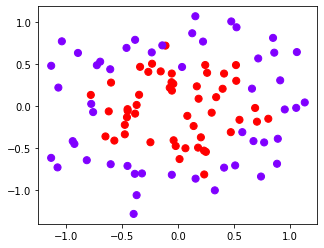

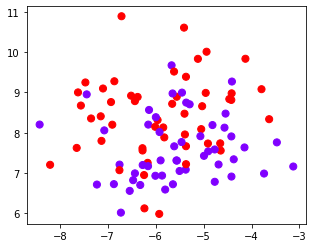

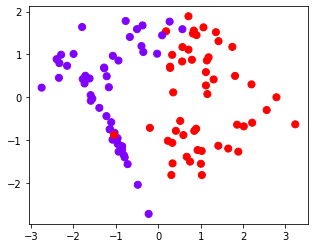

In [47]:
n_samples = 100

datasets =[
           make_moons(n_samples=n_samples , noise=0.2, random_state=0),
           make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
           make_blobs(n_samples=n_samples, centers=2, random_state=5),
           make_classification(n_samples=n_samples,n_features=2 , n_informative=2, n_redundant=0 , random_state=5)
]

Kernel = ["linear","poly","rbf","sigmoid"]
for X,Y in datasets:
  plt.figure(figsize=(5,4))
  plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")


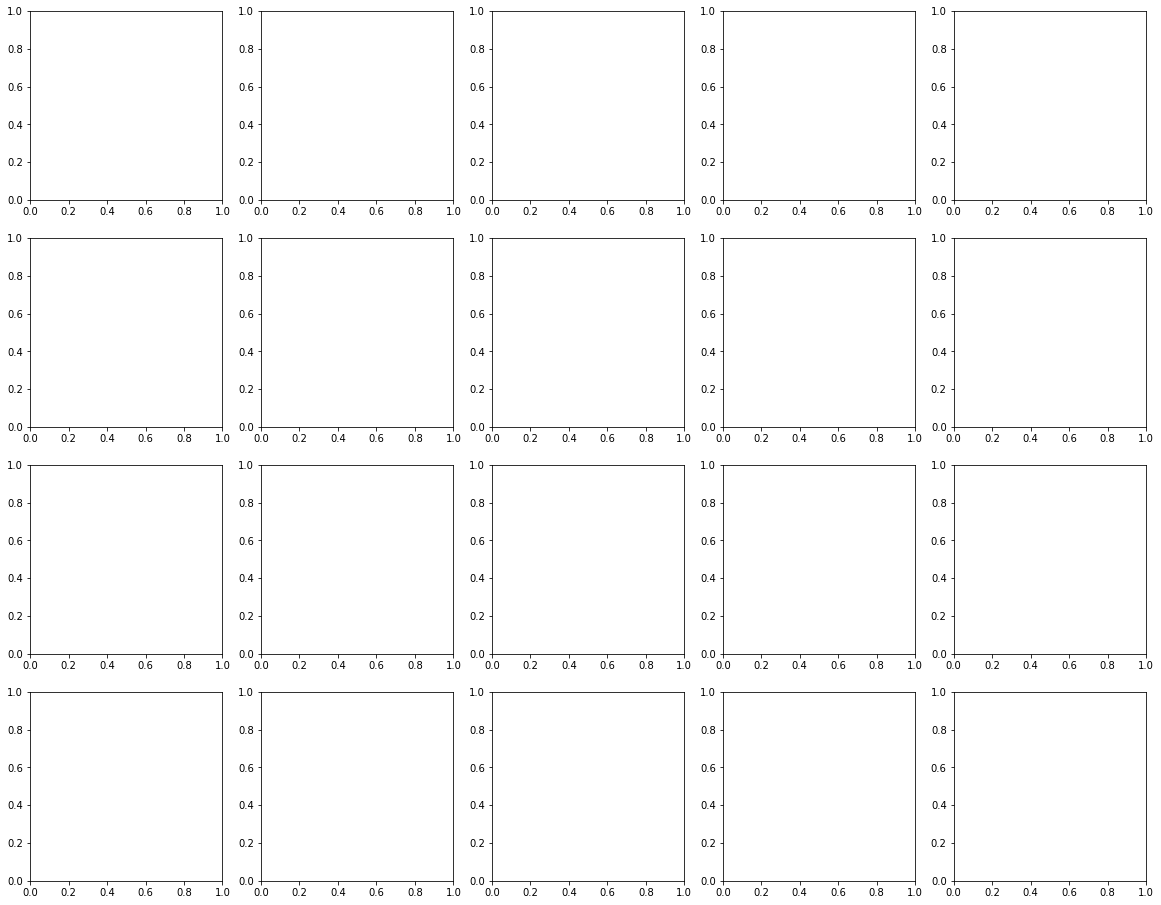

In [51]:
# 构建子图
nrows = len(datasets)
ncols = len(Kernel) + 1

fig, axes = plt.subplots(nrows, ncols,figsize=(20,16))




In [52]:
[*enumerate(datasets)]

[(0, (array([[-1.09443462e-02,  9.89784876e-01],
          [ 1.96749886e+00, -1.10921978e-01],
          [ 9.18923151e-01, -7.87831621e-03],
          [-1.97813183e-02,  3.67422878e-02],
          [ 8.97047211e-01, -5.26043067e-01],
          [ 2.05087697e+00,  4.82966687e-01],
          [ 5.52592656e-01,  5.10008493e-01],
          [ 9.36108682e-01, -6.67176177e-01],
          [-8.57905150e-03,  3.44030710e-01],
          [ 1.79962867e+00,  3.22578165e-01],
          [-1.79739813e-01,  5.12417381e-01],
          [ 1.96928635e+00, -1.84060982e-01],
          [ 1.40757108e+00, -6.55885144e-01],
          [ 1.04103920e+00,  1.04537944e+00],
          [ 6.11861752e-01,  5.09315861e-01],
          [-3.59476500e-01,  1.05930036e+00],
          [ 2.54029695e-01,  1.15116524e+00],
          [ 2.13555501e-01,  8.82321641e-01],
          [-3.30880800e-01,  8.04221145e-01],
          [ 1.06603845e+00,  5.32174106e-01],
          [-7.06988363e-01,  5.63246401e-01],
          [ 4.02928450e-01, -1.

In [53]:
# 开始循环
for ds_cnt , (X,Y) in enumerate(datasets):
  # 在图像中的第一列, 放置原数据的分布
  ax = axes[ds_cnt, 0]
  if ds_cnt == 0:
    ax.set_title("Input_data")
  ax.scatter(X[:,0],X[:,1],c=Y,zorder=10,cmap=plt.cm.Paired,edgecolors='k')
  ax.set_xticks(())
  ax.set_yticks(())

  # 第二层循环在核函数中循环
  for est_idx, kernel in enumerate(Kernel):
    ax = axes[ds_cnt, est_idx + 1]
    clf = SVC(kernel=kernel, gamma=2).fit(X,Y)
    score = clf.score(X,Y)

    # 画图
    ax.scatter(X[:,0],X[:,1],c =Y
               ,zorder=10
               ,cmap=plt.cm.Paired,edgecolors='k')
    # 绘制支持向量
    ax.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=50,
               facecolors='none',zorder=10,edgecolors='k')
    
    # 绘制决策边界
    x_min,x_max =X[:,0].min()- .5,X[:,0].max() + .5
    y_min,y_max =X[:,0].min()- .5,X[:,0].max() + .5

    XX ,YY = np.mgrid[x_min:x_max:200j ,y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(),YY.ravel()]).reshape(XX.shape)
    #填充等高线
    ax.pcolormesh(XX,YY,Z>0,cmap=plt.cm.Paired)

    #绘制等高线
    ax.contour(XX,YY,Z,colors=['k','k','k'],linestyles=['--','-','--'],
               levels=[-1,0,1])
    
    #设定坐标轴不显示
    ax.set_xticks(())
    ax.set_yticks(())

    if ds_cnt == 0:
      ax.set_title(kernel)

    ax.text(0.95,0.06,('%.2f'% score).lstrip('0')
            ,size =15
            ,bbox=dict(boxstyle='round',alpha=0.8,facecolor='white')
            ,transform=ax.transAxes
            ,horizontalalignment='right'
            ) 
  plt.tight_layout()
  plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: No contour levels were found within the data range.


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [21]:
x,y = make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)

In [22]:
x.shape

(50, 2)

In [23]:
y.shape

(50,)

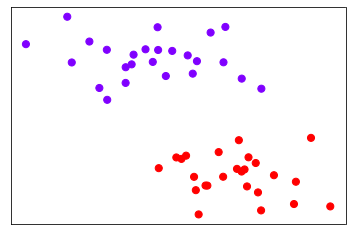

In [24]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")

plt.xticks([])
plt.yticks([])
plt.show()

In [25]:
xlim = ax.get_xlim()
ylim = ax.get_ylim()

axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)

In [26]:
axisx

array([-1.37612247, -1.24979273, -1.12346299, -0.99713325, -0.8708035 ,
       -0.74447376, -0.61814402, -0.49181428, -0.36548454, -0.2391548 ,
       -0.11282506,  0.01350468,  0.13983442,  0.26616417,  0.39249391,
        0.51882365,  0.64515339,  0.77148313,  0.89781287,  1.02414261,
        1.15047235,  1.27680209,  1.40313184,  1.52946158,  1.65579132,
        1.78212106,  1.9084508 ,  2.03478054,  2.16111028,  2.28744002])

In [27]:
axisy,axisx = np.meshgrid(axisy,axisx)

In [28]:
axisy.shape

(30, 30)

In [29]:
xy = np.vstack([axisx.ravel(),axisy.ravel()]).T 

In [30]:
xy

array([[-1.37612247, -0.94562869],
       [-1.37612247, -0.86293562],
       [-1.37612247, -0.78024254],
       ...,
       [ 2.28744002,  1.28708434],
       [ 2.28744002,  1.36977741],
       [ 2.28744002,  1.45247049]])

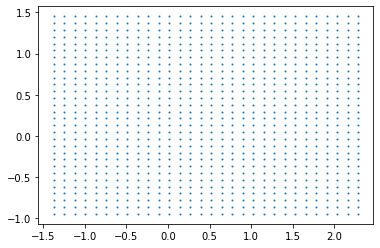

In [31]:
plt.scatter(xy[:,0],xy[:,1],s=1,cmap="rainbow")

In [32]:
a = np.array([1,2,3])
b = np.array([7,8])

In [33]:
# 两个一维向量转化为特征矩阵
v1,v2 = np.meshgrid(a,b)

In [34]:
v1

array([[1, 2, 3],
       [1, 2, 3]])

In [35]:
v2

array([[7, 7, 7],
       [8, 8, 8]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'level'
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'colos'


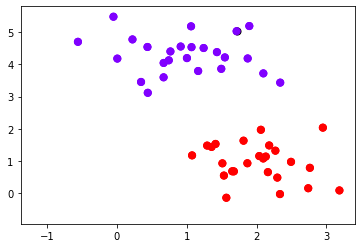

In [36]:
#建模 计算决策边界
clf = SVC(kernel="linear").fit(x,y)
z = clf.decision_function(xy).reshape(axisx.shape)
# decision_function 返回输入样本所对应的到决策边界的距离

ax.contour(axisx,axisy,z
           ,colors="k"
           ,level=[-1,0,1]
           ,alpha=0.5
           ,linestyles=["--","-","--"])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")
plt.scatter(x[10,0],x[10,1],c="black",s=50,cmap="rainbow")

clf.decision_function(x[10].reshape(1,2))
plt.scatter(x[:,0],x[:,1],c=y ,s=50,cmap="rainbow")
ax = plt.gca()
ax.contour(axisx,axisy,z
           ,colos="k",
           levels=[-3.33917354]
           ,alpha=0.5
           ,)